<a href="https://colab.research.google.com/github/Shirleyhanx1/Customer-Churn-Porject---Python/blob/main/Telco_Customer_Churn_Project_(Shirley).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install inflection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt

import inflection

sns.set(style = 'white')




In [ ]:
from google.colab import files
uploaded = files.upload()

import io
churn = pd.read_csv(io.BytesIO(uploaded['Telco-Customer-Churn.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (2).csv


In [ ]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
churn.duplicated().sum()

0

In [ ]:
churn.TotalCharges = pd.to_numeric(churn.TotalCharges, errors='coerce')
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# renaming the column
column_list = list(churn.columns)

for i, col in enumerate(column_list):
  column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

churn.columns = column_list
churn.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Removing missing values 
churn.dropna(inplace = True)

#Remove customer IDs from the data set

df2 = churn.drop(['customer_id'], axis = 1)

#Convertin the predictor variable in a binary numeric variable
df2['churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,...,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
df_dummies.columns.values

array(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'churn', 'gender_Female', 'gender_Male', 'partner_No',
       'partner_Yes', 'dependents_No', 'dependents_Yes',
       'phone_service_No', 'phone_service_Yes', 'multiple_lines_No',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'internet_service_DSL', 'internet_service_Fiber optic',
       'internet_service_No', 'online_security_No',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_Month-to-month',
     

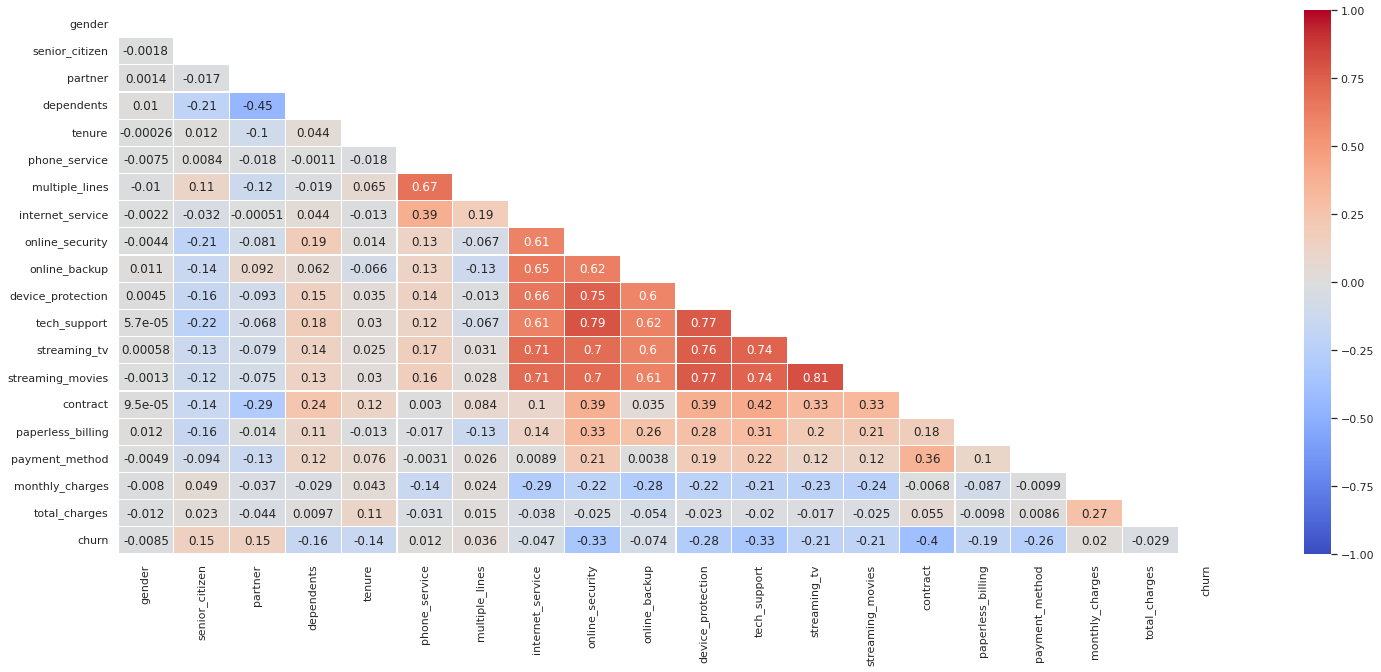

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(25, 10))

corr = df2.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr, 
                 yticklabels=corr, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

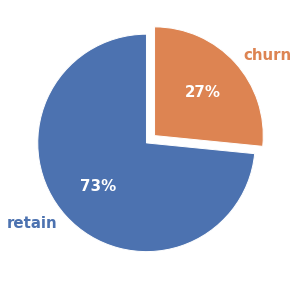

In [ ]:
pie_data = df_dummies['churn'].value_counts(normalize=True).values * 100
fig, ax = plt.subplots(figsize=(5,5))

wedges, texts, autotexts = ax.pie(pie_data, labels= ['retain','churn'],
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':15, 'weight':'bold'})


for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())


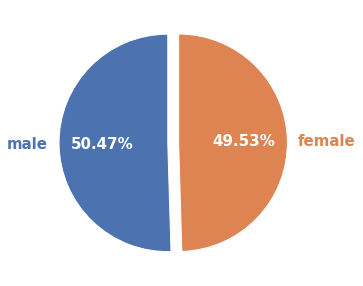

In [ ]:
pie_data = df_dummies['gender_Female'].value_counts(normalize=True).values * 100


fig, ax = plt.subplots(figsize=(5,5))

wedges, texts, autotexts = ax.pie(pie_data, labels= ['male','female'],
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.2f%%',
                                  textprops={'color':'w', 'fontsize':15, 'weight':'bold'})


for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

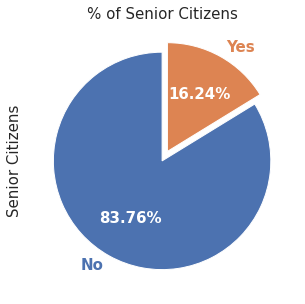

In [ ]:
pie_data = churn['senior_citizen'].value_counts(normalize=True).values * 100


fig, ax = plt.subplots(figsize=(5,5))

wedges, texts, autotexts = ax.pie(pie_data, labels= ['No','Yes'],
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.2f%%',
                                  textprops={'color':'w', 'fontsize':15, 'weight':'bold'})


ax.set_ylabel('Senior Citizens',fontsize = 15)
ax.set_title('% of Senior Citizens', fontsize = 15)

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())


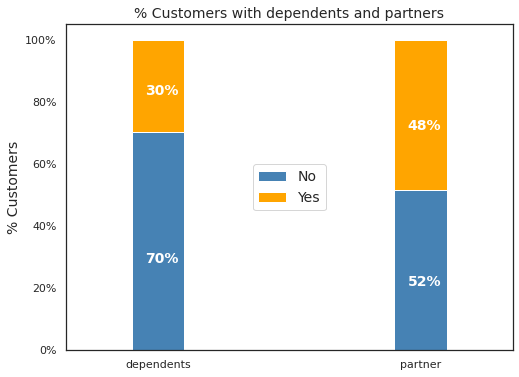

In [ ]:
df2 = pd.melt(churn, id_vars=['customer_id'], value_vars=['dependents','partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(churn)
colors = ['steelblue','orange']
ax = df3.loc[:,'customer_id'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

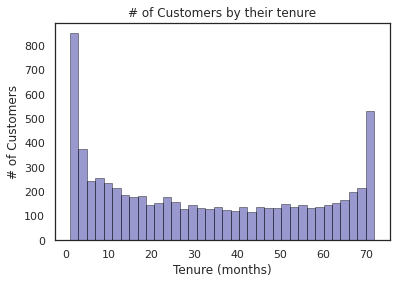

In [ ]:
ax = sns.distplot(churn['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')



Text(0.5, 1.0, '# of Customers by Contract Type')

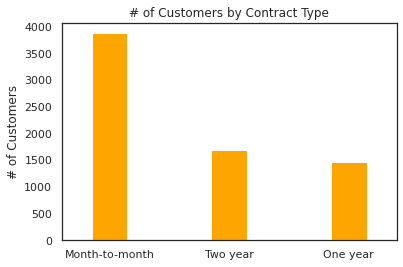

In [ ]:
ax = churn['contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color = 'orange')
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Two Year Contract')

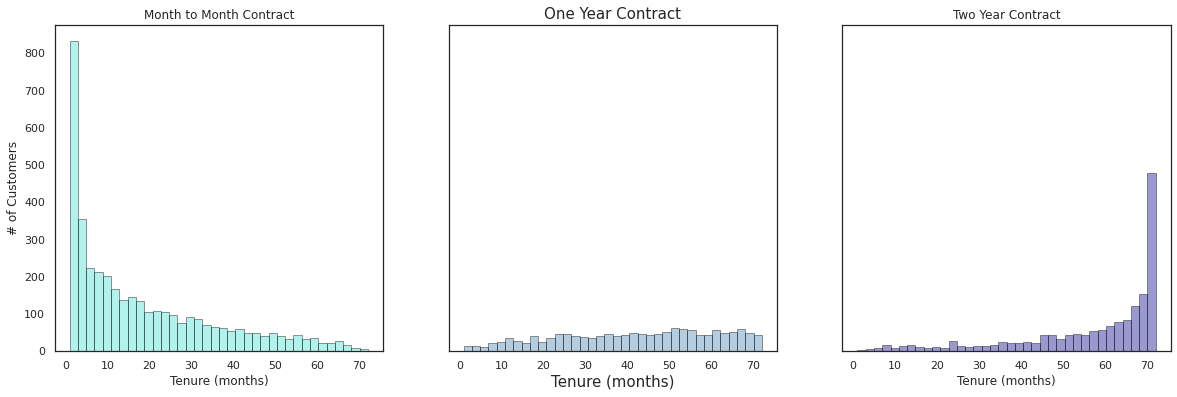

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(churn[churn['contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(churn[churn['contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 15)
ax.set_title('One Year Contract',size = 15)

ax = sns.distplot(churn[churn['contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

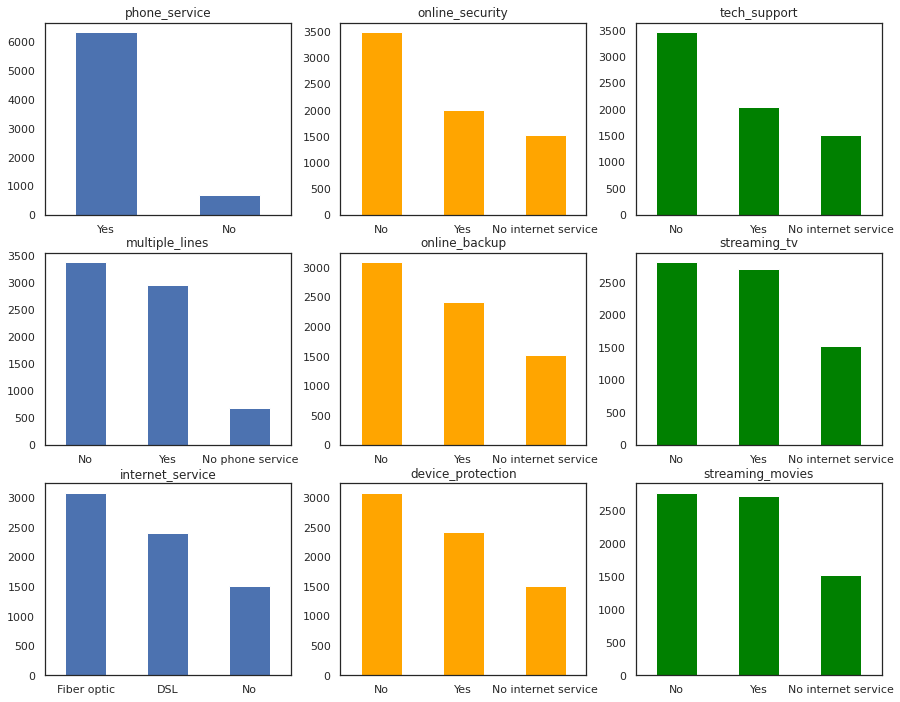

In [ ]:
services = ['phone_service','multiple_lines','internet_service','online_security',
           'online_backup','device_protection','tech_support','streaming_tv','streaming_movies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = churn[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = churn[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color = 'orange')
        
    elif i < 9:
        ax = churn[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = 'green')
    
    ax.set_title(item)

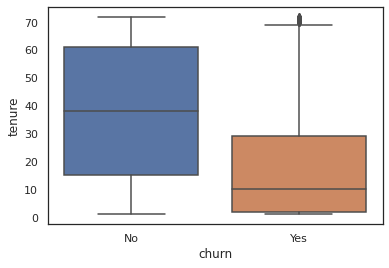

In [ ]:
sns.boxplot(x = churn.churn, y = churn.tenure)

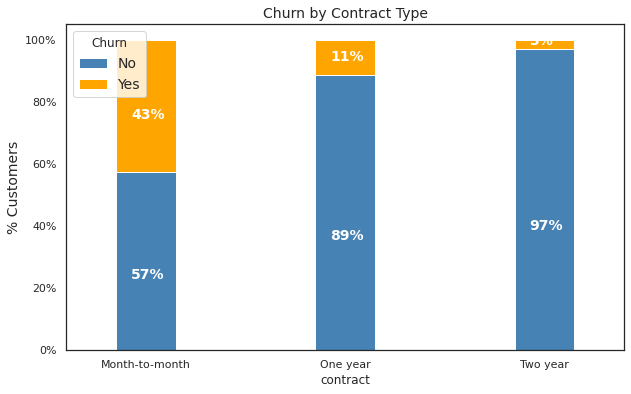

In [ ]:
colors = ['steelblue','orange']
contract_churn = churn.groupby(['contract','churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

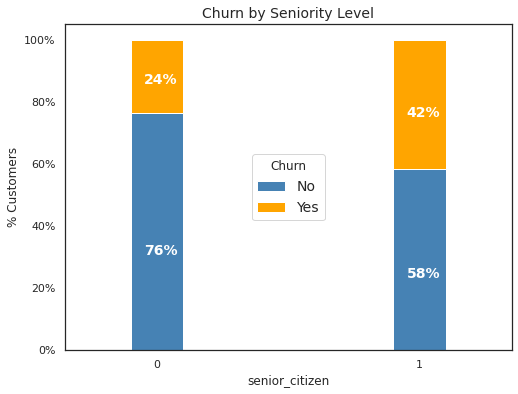

In [ ]:
colors = ['steelblue','orange']
seniority_churn = churn.groupby(['senior_citizen','churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

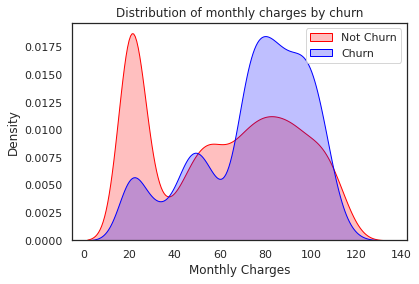

In [ ]:
ax = sns.kdeplot(churn.monthly_charges[(churn["churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(churn.monthly_charges[(churn["churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')



Text(0.5, 1.0, 'Distribution of total charges by churn')

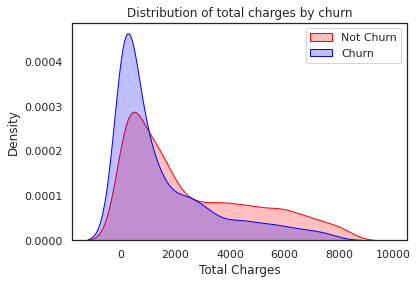

In [ ]:
ax = sns.kdeplot(churn.total_charges[(churn ["churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(churn.total_charges[(churn["churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

In [ ]:
# We will use the data frame where we had created dummy variables
y = df_dummies['churn'].values
X = df_dummies.drop(columns = ['churn'])


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
# Scaling all the variables to StabdardScaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn import metrics
preds = classifier.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, preds))

0.8123222748815165


In [ ]:
# Create the classificaton reports
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1549
           1       0.67      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.81      0.81      0.81      2110



AxesSubplot(0.125,0.125;0.775x0.755)


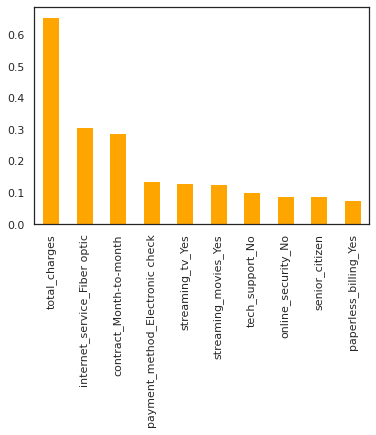

In [ ]:
# To get the weights of all the variables
weights = pd.Series(classifier.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar', color = 'orange'))

AxesSubplot(0.125,0.125;0.775x0.755)


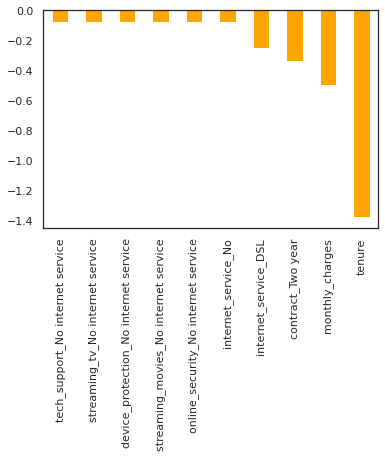

In [ ]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar',color = 'orange'))

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
preds = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, preds))

0.8088130774697939


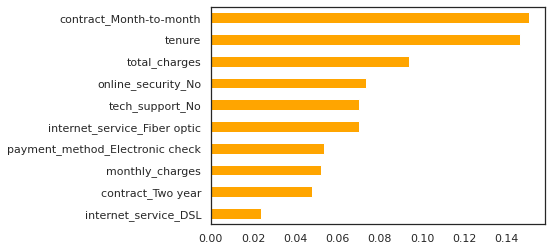

In [ ]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh',color ='orange')

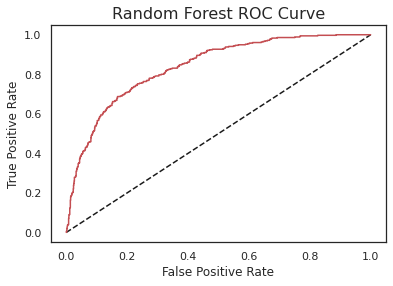

In [ ]:
# ROC curve
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = metrics.roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show()

In [ ]:
# SVM -------(this seems has problem, it is very slow)


#from sklearn.svm import SVC
#classifier = SVC(kernel = 'linear')
#classifier.fit(X_train, y_train)
#preds = classifier.predict(X_test)
#metrics.accuracy_score(y_test, preds)
#print(metrics.acuracy_score(y_test, preds))

In [ ]:
# Create the classificaton reports
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
#print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1052
           1       0.66      0.49      0.56       355

    accuracy                           0.81      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.80      0.81      0.80      1407



In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11) 
classifier.fit(X_train,y_train)
#preds = classifier.predict(X_test).            -------------Not sure, why from here until end, use this sentence is couldn't work
accuracy_knn = classifier.score(X_test, y_test)
print("KNN accuracy is:",accuracy_knn)

KNN accuracy is: 0.7860696517412935


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
#preds = classifier.predict(X_test)
accuracy_dt = classifier.score(X_test, y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7235252309879175


In [ ]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,y_train)
#preds = model.predict(X_test)
accuracy_ADA = model.score (X_test, y_test)
print("AdaBoost accuracy is : ", accuracy_ADA)

AdaBoost accuracy is :  0.8123667377398721


In [ ]:
# XGBoost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
#preds = model.predict(X_test)
accuracy_XGB = model.score (X_test, y_test)
print("XGBoost accuracy is :", accuracy_XGB)

XGBoost accuracy is : 0.8116560056858564


In [ ]:
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
#preds = model.predict(X_test)
accuracy_GradB = model.score (X_test, y_test)
print("Gradient Boosting accuracy is :", accuracy_GradB )

Gradient Boosting accuracy is : 0.8081023454157783
